In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


In [2]:
data = pd.read_csv("data_clean.csv")
data

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [4]:
print(type(data))
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
(158, 10)


In [9]:
data.shape

(158, 10)

In [11]:
data.dtypes

Unnamed: 0      int64
Ozone         float64
Solar.R       float64
Wind          float64
Temp C         object
Month          object
Day             int64
Year            int64
Temp            int64
Weather        object
dtype: object

In [13]:
data1 = data.drop(['Unnamed: 0', "Temp C"], axis=1)
data1

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2010,67,S
1,36.0,118.0,8.0,5,2,2010,72,C
2,12.0,149.0,12.6,5,3,2010,74,PS
3,18.0,313.0,11.5,5,4,2010,62,S
4,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2010,67,C
154,30.0,193.0,6.9,9,26,2010,70,PS
155,NaN,145.0,13.2,9,27,2010,77,S
156,14.0,191.0,14.3,9,28,2010,75,S


In [15]:
data1['Month']=pd.to_numeric(data['Month'],errors='coerce')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    157 non-null    float64
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 10.0+ KB


In [17]:
data1.rename({'Solar.R': 'Solar'},axis=1, inplace=True)
data1

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S
156,14.0,191.0,14.3,9.0,28,2010,75,S


In [19]:
data1.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

<Axes: >

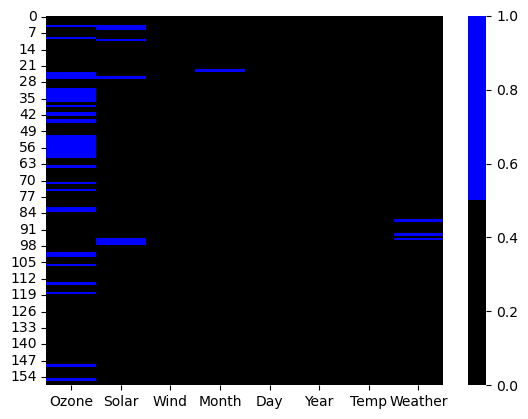

In [21]:
import seaborn as sns
cols =  data1.columns
colours = ['black', 'blue']
sns.heatmap(data1[cols].isnull(),cmap=sns.color_palette(colours),cbar = True)

In [22]:
median_ozone = data1["Ozone"].median()
mean_ozone = data1["Ozone"].mean()
print("Median of Ozone: ", median_ozone)
print("Mean of Ozone: ", mean_ozone)

Median of Ozone:  30.5
Mean of Ozone:  41.583333333333336


In [23]:
data1['Ozone'] = data1['Ozone'].fillna(median_ozone)
data1.isnull().sum()

Ozone      0
Solar      7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [27]:

median_ozone = data1["Solar"].median()
mean_ozone = data1["Ozone"].mean()
print("Median of Ozone: ", median_ozone)
print("Mean of Ozone: ", mean_ozone)

Median of Ozone:  197.0
Mean of Ozone:  38.91772151898734


In [29]:
data1['Solar'] = data1['Ozone'].fillna(median_ozone)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [31]:
print(data1["Weather"].value_counts())
mode_weather = data1["Weather"].mode()[0]
print(mode_weather)

Weather
S     59
C     49
PS    47
Name: count, dtype: int64
S


In [33]:

data1["Weather"] = data1["Weather"].fillna(mode_weather)
data1.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

In [35]:
data1.tail()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
153,41.0,41.0,7.4,5.0,1,2010,67,C
154,30.0,30.0,6.9,9.0,26,2010,70,PS
155,30.5,30.5,13.2,9.0,27,2010,77,S
156,14.0,14.0,14.3,9.0,28,2010,75,S
157,18.0,18.0,8.0,9.0,29,2010,76,C


In [37]:
data1.reset_index(drop=True)

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,41.0,7.4,5.0,1,2010,67,S
1,36.0,36.0,8.0,5.0,2,2010,72,C
2,12.0,12.0,12.6,5.0,3,2010,74,PS
3,18.0,18.0,11.5,5.0,4,2010,62,S
4,30.5,30.5,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,41.0,7.4,5.0,1,2010,67,C
154,30.0,30.0,6.9,9.0,26,2010,70,PS
155,30.5,30.5,13.2,9.0,27,2010,77,S
156,14.0,14.0,14.3,9.0,28,2010,75,S


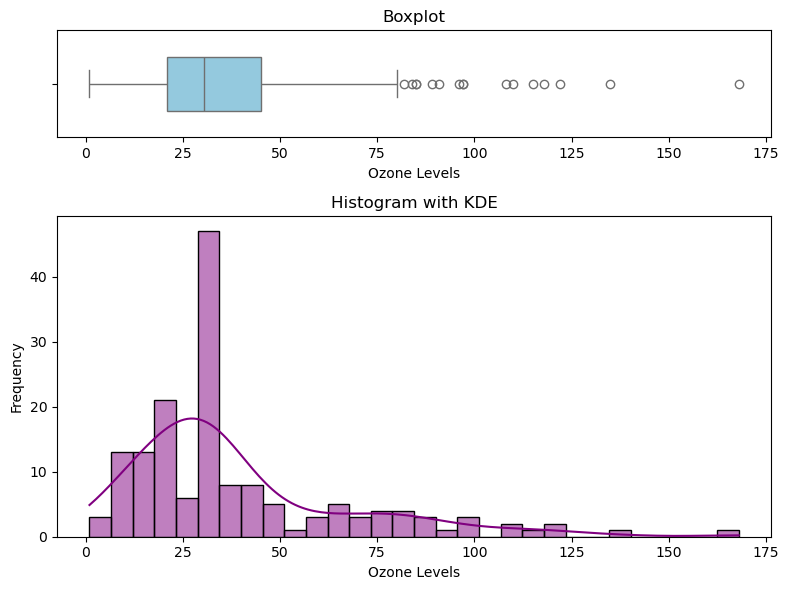

In [39]:

fig, axes = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 3]})
sns.boxplot(data=data1["Ozone"], ax=axes[0], color='skyblue', width=0.5, orient = 'h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Ozone Levels")
sns.histplot(data1["Ozone"], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Ozone Levels")
axes[1].set_ylabel("Frequency")
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'violin plot')

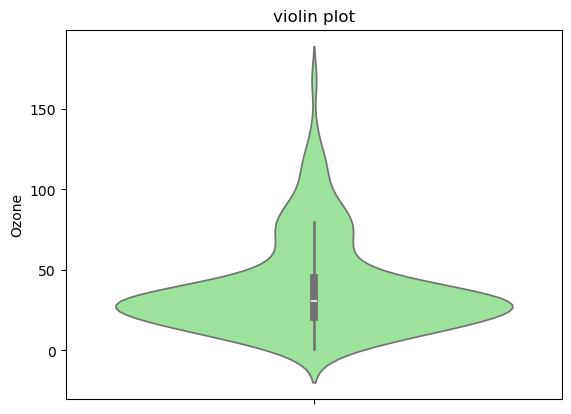

In [40]:
sns.violinplot(data=data1["Ozone"], color='lightgreen')
plt.title("violin plot")

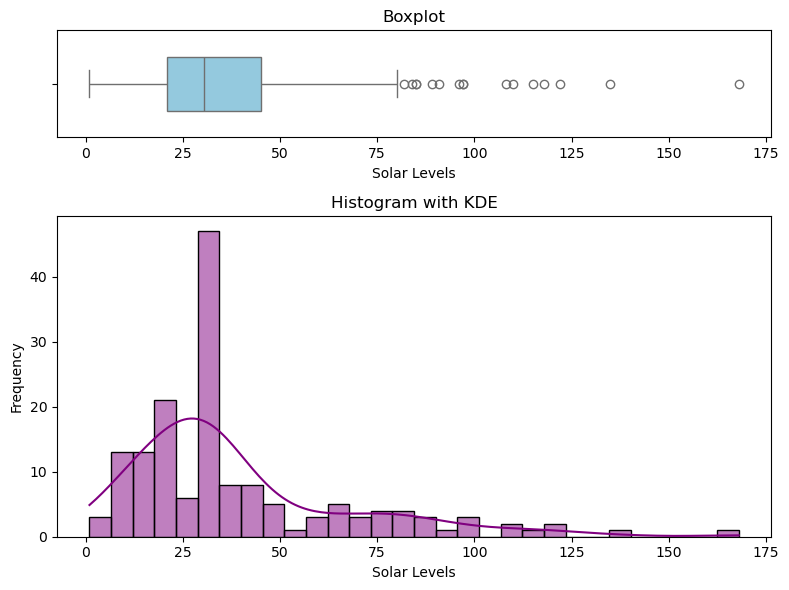

In [42]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 3]})
sns.boxplot(data=data1["Solar"], ax=axes[0], color='skyblue', width=0.5, orient = 'h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Solar Levels")
sns.histplot(data1["Solar"], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Solar Levels")
axes[1].set_ylabel("Frequency")
plt.tight_layout()
plt.show()


[array([115., 135.,  97.,  97.,  85., 108.,  82., 122.,  89., 110., 168.,
        118.,  84.,  85.,  96.,  91.])]

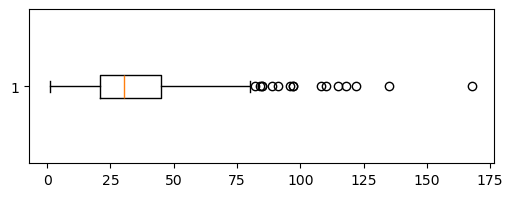

In [44]:
plt.figure(figsize=(6,2))
boxplot_data = plt.boxplot(data1["Ozone"], vert=False)
[item.get_xdata() for item in boxplot_data['fliers']]

In [46]:
data1["Ozone"].describe()

count    158.000000
mean      38.917722
std       28.794730
min        1.000000
25%       21.000000
50%       30.500000
75%       45.000000
max      168.000000
Name: Ozone, dtype: float64

In [48]:
mu = data1["Ozone"].describe()[1]
sigma = data1["Ozone"].describe()[2]
for x in data1["Ozone"]:
    if ((x < (mu - 3*sigma)) or (x > (mu + 3*sigma))):
        print(x)

135.0
168.0


C:\Users\sande\AppData\Local\Temp\ipykernel_2548\2621657408.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mu = data1["Ozone"].describe()[1]
C:\Users\sande\AppData\Local\Temp\ipykernel_2548\2621657408.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma = data1["Ozone"].describe()[2]


Text(0.5, 0, 'Theoretical Quantiles')

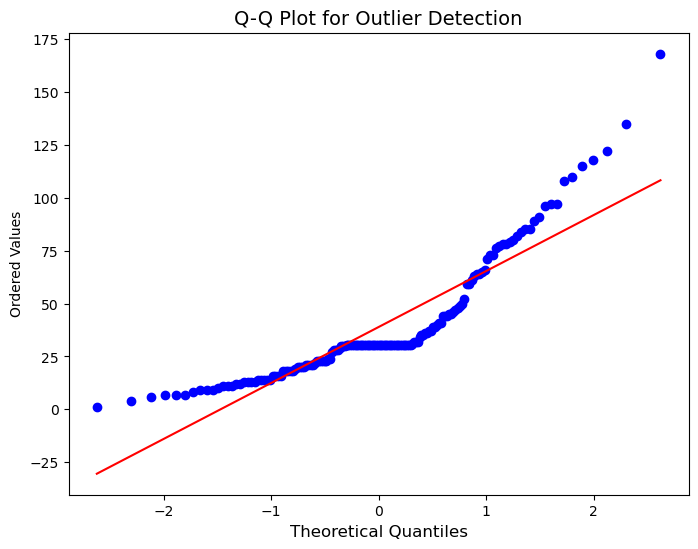

In [51]:
import scipy.stats as stats
plt.figure(figsize=(8, 6))
stats.probplot(data1["Ozone"], dist="norm", plot=plt)
plt.title("Q-Q Plot for Outlier Detection", fontsize=14)
plt.xlabel("Theoretical Quantiles", fontsize=12)

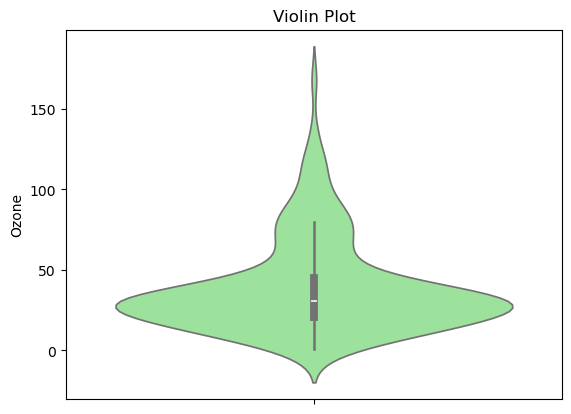

In [52]:
sns.violinplot(data=data1["Ozone"], color='lightgreen')
plt.title("Violin Plot")
plt.show()

<Axes: xlabel='Weather', ylabel='Ozone'>

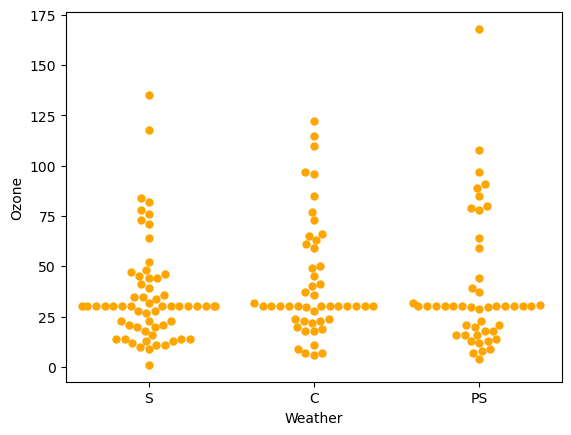

In [55]:
sns.swarmplot(data=data1, x = "Weather", y = "Ozone",color="orange", size=6)

<Axes: xlabel='Weather', ylabel='Ozone'>

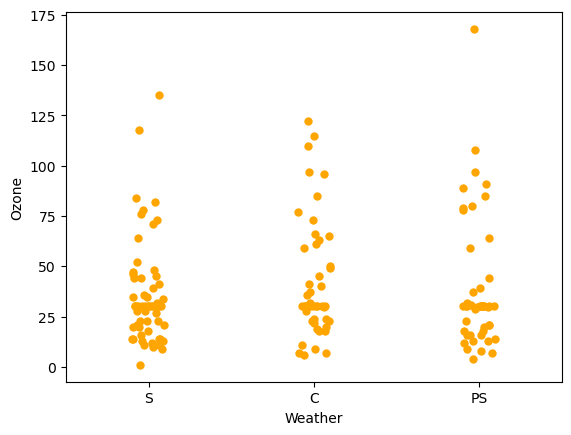

In [56]:
sns.stripplot(data=data1, x = "Weather", y = "Ozone",color="orange", size=6, jitter = True)

<Axes: xlabel='Ozone', ylabel='Density'>

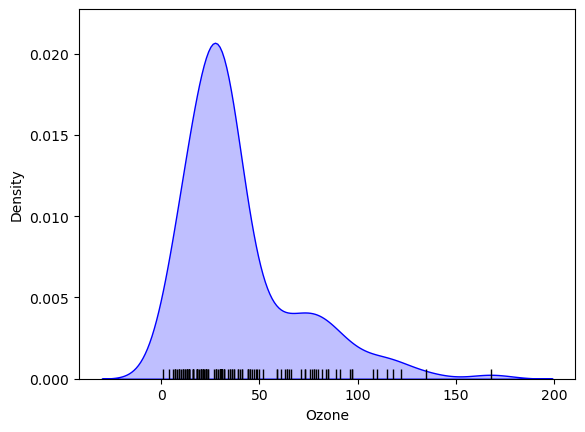

In [57]:
sns.kdeplot(data=data1["Ozone"], fill=True, color="blue")
sns.rugplot(data=data1["Ozone"], color="black")


<Axes: xlabel='Weather', ylabel='Ozone'>

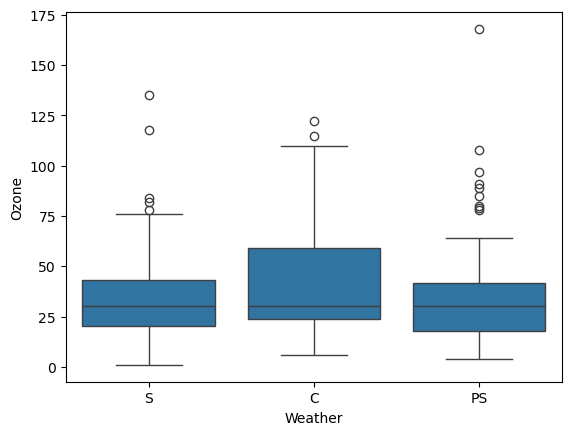

In [59]:
sns.boxplot(data = data1, x = "Weather", y="Ozone")

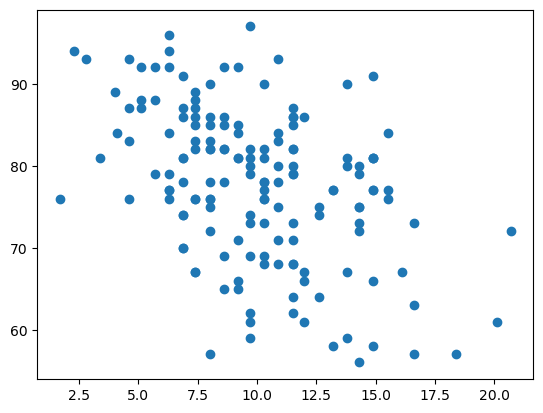

In [61]:
plt.scatter(data1["Wind"], data1["Temp"])

In [63]:
data1["Wind"].corr(data1["Temp"])

-0.4412467176312391

In [67]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    158 non-null    float64
 1   Solar    158 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    157 non-null    float64
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  158 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 10.0+ KB


In [69]:
data1_numeric = data1.iloc[:,[0,1,2,6]]
data1_numeric

,Ozone,Solar,Wind,Temp
0,41.0,41.0,7.4,67
1,36.0,36.0,8.0,72
2,12.0,12.0,12.6,74
3,18.0,18.0,11.5,62
4,30.5,30.5,14.3,56
...,...,...,...,...
153,41.0,41.0,7.4,67
154,30.0,30.0,6.9,70
155,30.5,30.5,13.2,77
156,14.0,14.0,14.3,75


In [71]:
data1_numeric.corr()

,Ozone,Solar,Wind,Temp
Ozone,1.000000,1.000000,-0.526616,0.596304
Solar,1.000000,1.000000,-0.526616,0.596304
Wind,-0.526616,-0.526616,1.000000,-0.441247
Temp,0.596304,0.596304,-0.441247,1.000000


Observations

1. The highest correlation strength is observed between Ozone and Temperature (0.597087)
2. The next highest correlation strength is observed between Ozone and Wind (-0.523738)
3. The next highest correlation strength is observed between Wind and Temp (-0.441228)
4.  The least correlation strength is observed between Solar and Wind (-0.055874)


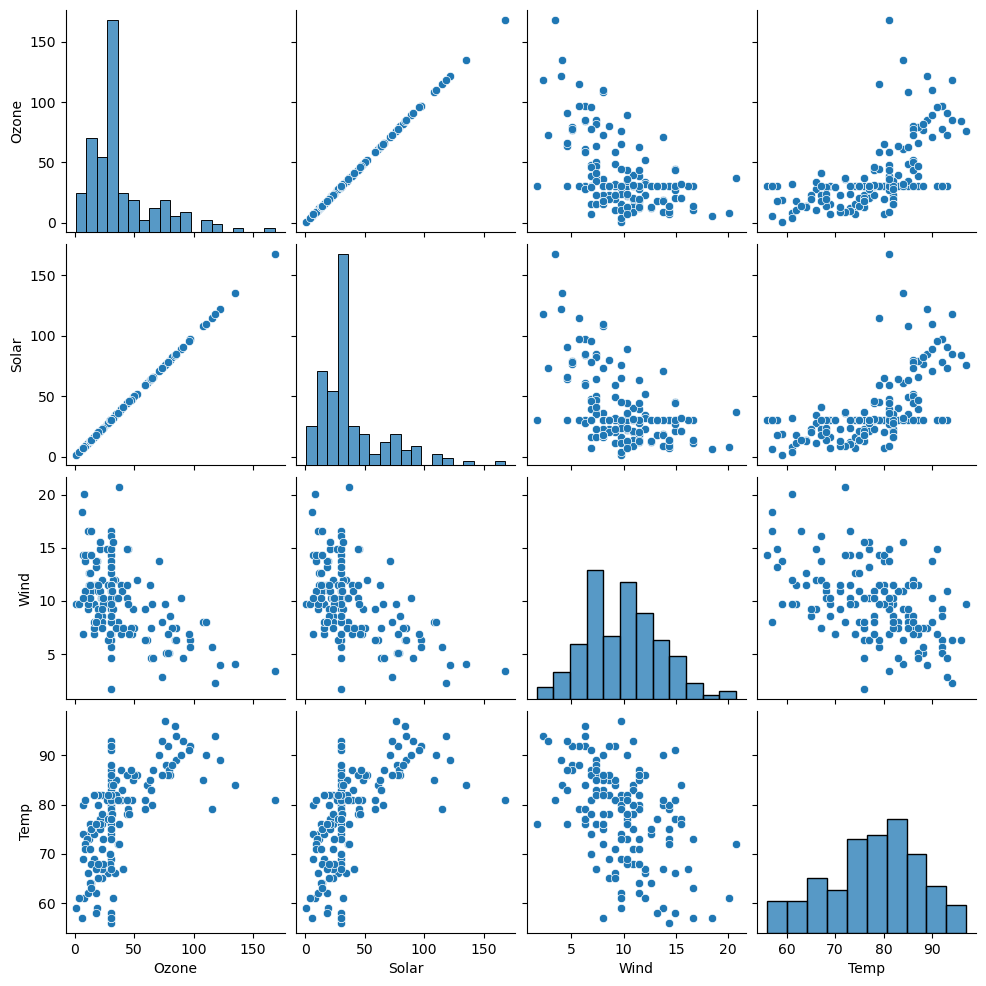

In [74]:
sns.pairplot(data1_numeric)

In [75]:
data2=pd.get_dummies(data1,columns=['Month','Weather'])
data2

,Ozone,Solar,Wind,Day,Year,Temp,Month_5.0,Month_6.0,Month_7.0,Month_8.0,Month_9.0,Weather_C,Weather_PS,Weather_S
0,41.0,41.0,7.4,1,2010,67,True,False,False,False,False,False,False,True
1,36.0,36.0,8.0,2,2010,72,True,False,False,False,False,True,False,False
2,12.0,12.0,12.6,3,2010,74,True,False,False,False,False,False,True,False
3,18.0,18.0,11.5,4,2010,62,True,False,False,False,False,False,False,True
4,30.5,30.5,14.3,5,2010,56,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,41.0,41.0,7.4,1,2010,67,True,False,False,False,False,True,False,False
154,30.0,30.0,6.9,26,2010,70,False,False,False,False,True,False,True,False
155,30.5,30.5,13.2,27,2010,77,False,False,False,False,True,False,False,True
156,14.0,14.0,14.3,28,2010,75,False,False,False,False,True,False,False,True


In [82]:
data1_numeric.values

array([[ 41. ,  41. ,   7.4,  67. ],
       [ 36. ,  36. ,   8. ,  72. ],
       [ 12. ,  12. ,  12.6,  74. ],
       [ 18. ,  18. ,  11.5,  62. ],
       [ 30.5,  30.5,  14.3,  56. ],
       [ 28. ,  28. ,  14.9,  66. ],
       [ 23. ,  23. ,   8.6,  65. ],
       [ 19. ,  19. ,  13.8,  59. ],
       [  8. ,   8. ,  20.1,  61. ],
       [ 30.5,  30.5,   8.6,  69. ],
       [  7. ,   7. ,   6.9,  74. ],
       [ 16. ,  16. ,   9.7,  69. ],
       [ 11. ,  11. ,   9.2,  66. ],
       [ 14. ,  14. ,  10.9,  68. ],
       [ 18. ,  18. ,  13.2,  58. ],
       [ 14. ,  14. ,  11.5,  64. ],
       [ 34. ,  34. ,  12. ,  66. ],
       [  6. ,   6. ,  18.4,  57. ],
       [ 30. ,  30. ,  11.5,  68. ],
       [ 11. ,  11. ,   9.7,  62. ],
       [  1. ,   1. ,   9.7,  59. ],
       [ 11. ,  11. ,  16.6,  73. ],
       [  4. ,   4. ,   9.7,  61. ],
       [ 32. ,  32. ,  12. ,  61. ],
       [ 30.5,  30.5,  16.6,  57. ],
       [ 30.5,  30.5,  14.9,  58. ],
       [ 30.5,  30.5,   8. ,  57. ],
 

In [86]:
#Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

array = data1_numeric.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array)

set_printoptions(precision=2)
print(rescaledX[0:10,:])

[[0.24 0.24 0.3  0.27]
 [0.21 0.21 0.33 0.39]
 [0.07 0.07 0.57 0.44]
 [0.1  0.1  0.52 0.15]
 [0.18 0.18 0.66 0.  ]
 [0.16 0.16 0.69 0.24]
 [0.13 0.13 0.36 0.22]
 [0.11 0.11 0.64 0.07]
 [0.04 0.04 0.97 0.12]
 [0.18 0.18 0.36 0.32]]


In [94]:
#Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler

array = data1_numeric.values
scaler = StandardScaler()
rescaledX = scaler.fit_transform(array)

#summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:10,:])

[[ 0.07  0.07 -0.73 -1.15]
 [-0.1  -0.1  -0.56 -0.61]
 [-0.94 -0.94  0.75 -0.4 ]
 [-0.73 -0.73  0.44 -1.68]
 [-0.29 -0.29  1.24 -2.32]
 [-0.38 -0.38  1.41 -1.25]
 [-0.55 -0.55 -0.39 -1.36]
 [-0.69 -0.69  1.1  -2.  ]
 [-1.08 -1.08  2.9  -1.79]
 [-0.29 -0.29 -0.39 -0.93]]
